In [314]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [814]:
df = pd.read_csv('/Users/berk/Desktop/spaceship-titanic/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [815]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [816]:
df.drop(['Name'], axis=1, inplace=True)

In [817]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [818]:
print("Categorical Variables")
categorical_variables = df.select_dtypes(include=['object']).columns
for col in categorical_variables:
    print(col)

Categorical Variables
PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP


In [819]:
print("Numerical Variables")
numerical_variables = df._get_numeric_data().columns
for col in numerical_variables:
    print(col)

Numerical Variables
Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck
Transported


In [820]:
def get_nulls(df):
    dict_nulls = {}
    for col in  df.columns:
        dict_nulls[col]=df[col].isnull().sum()

    df_nulls = pd.DataFrame(data=list(dict_nulls.values()), 
                            index=list(dict_nulls.keys()), 
                            columns=['#nulls'])
    return df_nulls

get_nulls(df)

,#nulls
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


In [821]:
def get_nulls_percentage(df):    
    dict_nulls = {}
    for col in  df.columns:
        percentage_null_values = str(round(df[col].isnull().sum()/len(df),2))+\
        "%"
        dict_nulls[col] = percentage_null_values
    
    df_nulls = pd.DataFrame(data=list(dict_nulls.values()), 
                            index=list(dict_nulls.keys()), 
                            columns=['% nulls'])
    return df_nulls
    
get_nulls_percentage(df)
    

,% nulls
PassengerId,0.0%
HomePlanet,0.02%
CryoSleep,0.02%
Cabin,0.02%
Destination,0.02%
Age,0.02%
VIP,0.02%
RoomService,0.02%
FoodCourt,0.02%
ShoppingMall,0.02%


In [822]:
df['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [823]:
df['TotalExpensesforCryoSleep'] = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
df['TotalExpensesforVIP'] = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,TotalExpensesforCryoSleep,TotalExpensesforVIP
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,736.0,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,10383.0,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,5176.0,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1091.0,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,8536.0,8536.0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,1873.0,1873.0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,4637.0,4637.0


<AxesSubplot:xlabel='TotalExpensesforVIP'>

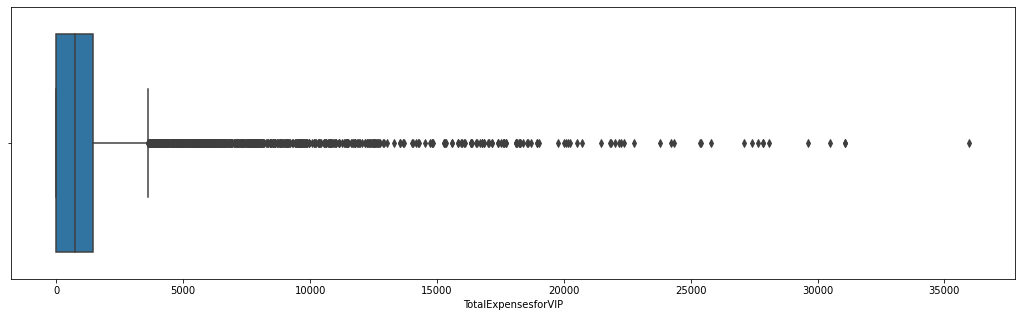

In [824]:
plt.figure(figsize=[18,5])
sns.boxplot(x=df['TotalExpensesforVIP'], data=df)

In [825]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalExpensesforCryoSleep,TotalExpensesforVIP
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,1440.866329,1440.866329
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,2803.045694,2803.045694
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,716.000000,716.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,1441.000000,1441.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,35987.000000,35987.000000


In [826]:
df['TotalExpensesforCryoSleep'] = df['TotalExpensesforCryoSleep'].apply(lambda x: True if x == 0 else False)
df['TotalExpensesforVIP'] = df['TotalExpensesforVIP'].apply(lambda x: True if x >= 2803 else False)

In [827]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,TotalExpensesforCryoSleep,TotalExpensesforVIP
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,True,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,False,False
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,False,True
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,False,True
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,False,True
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,True,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,False,False
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,False,True


In [828]:
nancryosleep = df[df['CryoSleep'].isnull()]
nancryosleep

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,TotalExpensesforCryoSleep,TotalExpensesforVIP
92,0099_02,Earth,NaN,G/12/P,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,0.0,True,True,False
98,0105_01,Earth,NaN,F/21/P,TRAPPIST-1e,27.0,False,0.0,0.0,570.0,2.0,131.0,False,False,False
104,0110_02,Europa,NaN,B/5/P,TRAPPIST-1e,40.0,False,0.0,331.0,0.0,0.0,1687.0,False,False,False
111,0115_01,Mars,NaN,F/24/P,TRAPPIST-1e,26.0,False,0.0,0.0,0.0,0.0,NaN,True,True,False
152,0173_01,Earth,NaN,E/11/S,TRAPPIST-1e,58.0,False,0.0,985.0,0.0,5.0,0.0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8620,9197_01,Europa,NaN,C/308/P,55 Cancri e,44.0,False,0.0,0.0,0.0,0.0,0.0,True,True,False
8651,9227_05,Earth,NaN,G/1498/P,TRAPPIST-1e,8.0,False,0.0,0.0,0.0,0.0,0.0,False,True,False
8664,9246_01,Earth,NaN,G/1490/S,TRAPPIST-1e,32.0,False,0.0,0.0,0.0,0.0,0.0,True,True,False
8675,9259_01,Earth,NaN,F/1893/P,TRAPPIST-1e,44.0,False,1030.0,1015.0,0.0,11.0,NaN,True,False,False


In [829]:
nancryosleep.drop(columns=['CryoSleep'], inplace=True)
nancryosleep.rename(columns={'TotalExpensesforCryoSleep': 'CryoSleep'}, inplace=True)
nancryosleep

/var/folders/pt/t0hqszgd5076m2mx3z6z7m7c0000gn/T/ipykernel_12480/2260550324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nancryosleep.drop(columns=['CryoSleep'], inplace=True)
/var/folders/pt/t0hqszgd5076m2mx3z6z7m7c0000gn/T/ipykernel_12480/2260550324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nancryosleep.rename(columns={'TotalExpensesforCryoSleep': 'CryoSleep'}, inplace=True)


,PassengerId,HomePlanet,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CryoSleep,TotalExpensesforVIP
92,0099_02,Earth,G/12/P,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,0.0,True,True,False
98,0105_01,Earth,F/21/P,TRAPPIST-1e,27.0,False,0.0,0.0,570.0,2.0,131.0,False,False,False
104,0110_02,Europa,B/5/P,TRAPPIST-1e,40.0,False,0.0,331.0,0.0,0.0,1687.0,False,False,False
111,0115_01,Mars,F/24/P,TRAPPIST-1e,26.0,False,0.0,0.0,0.0,0.0,NaN,True,True,False
152,0173_01,Earth,E/11/S,TRAPPIST-1e,58.0,False,0.0,985.0,0.0,5.0,0.0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8620,9197_01,Europa,C/308/P,55 Cancri e,44.0,False,0.0,0.0,0.0,0.0,0.0,True,True,False
8651,9227_05,Earth,G/1498/P,TRAPPIST-1e,8.0,False,0.0,0.0,0.0,0.0,0.0,False,True,False
8664,9246_01,Earth,G/1490/S,TRAPPIST-1e,32.0,False,0.0,0.0,0.0,0.0,0.0,True,True,False
8675,9259_01,Earth,F/1893/P,TRAPPIST-1e,44.0,False,1030.0,1015.0,0.0,11.0,NaN,True,False,False


In [830]:
nancryosleep = nancryosleep[['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'TotalExpensesforVIP']]
nancryosleep

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,TotalExpensesforVIP
92,0099_02,Earth,True,G/12/P,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,0.0,True,False
98,0105_01,Earth,False,F/21/P,TRAPPIST-1e,27.0,False,0.0,0.0,570.0,2.0,131.0,False,False
104,0110_02,Europa,False,B/5/P,TRAPPIST-1e,40.0,False,0.0,331.0,0.0,0.0,1687.0,False,False
111,0115_01,Mars,True,F/24/P,TRAPPIST-1e,26.0,False,0.0,0.0,0.0,0.0,NaN,True,False
152,0173_01,Earth,False,E/11/S,TRAPPIST-1e,58.0,False,0.0,985.0,0.0,5.0,0.0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8620,9197_01,Europa,True,C/308/P,55 Cancri e,44.0,False,0.0,0.0,0.0,0.0,0.0,True,False
8651,9227_05,Earth,True,G/1498/P,TRAPPIST-1e,8.0,False,0.0,0.0,0.0,0.0,0.0,False,False
8664,9246_01,Earth,True,G/1490/S,TRAPPIST-1e,32.0,False,0.0,0.0,0.0,0.0,0.0,True,False
8675,9259_01,Earth,False,F/1893/P,TRAPPIST-1e,44.0,False,1030.0,1015.0,0.0,11.0,NaN,True,False


In [831]:
df.dropna(subset=['CryoSleep'], inplace=True)
df.drop(columns=['TotalExpensesforCryoSleep'], inplace=True)
df = pd.concat([df, nancryosleep])
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,TotalExpensesforVIP
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,False
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,True
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,True
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8620,9197_01,Europa,True,C/308/P,55 Cancri e,44.0,False,0.0,0.0,0.0,0.0,0.0,True,False
8651,9227_05,Earth,True,G/1498/P,TRAPPIST-1e,8.0,False,0.0,0.0,0.0,0.0,0.0,False,False
8664,9246_01,Earth,True,G/1490/S,TRAPPIST-1e,32.0,False,0.0,0.0,0.0,0.0,0.0,True,False
8675,9259_01,Earth,False,F/1893/P,TRAPPIST-1e,44.0,False,1030.0,1015.0,0.0,11.0,NaN,True,False


In [832]:
totalexpensesvip = df[df['VIP'].isnull()]
totalexpensesvip.drop(columns=['VIP'], inplace=True)
totalexpensesvip

/var/folders/pt/t0hqszgd5076m2mx3z6z7m7c0000gn/T/ipykernel_12480/2764841588.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totalexpensesvip.drop(columns=['VIP'], inplace=True)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,TotalExpensesforVIP
38,0036_01,Earth,False,F/8/S,55 Cancri e,15.0,0.0,492.0,48.0,20.0,401.0,False,False
102,0108_03,Earth,False,G/19/S,TRAPPIST-1e,0.0,0.0,0.0,0.0,0.0,0.0,True,False
145,0165_01,Mars,True,F/37/P,TRAPPIST-1e,35.0,0.0,0.0,0.0,0.0,0.0,True,False
228,0244_02,Mars,True,F/47/S,55 Cancri e,14.0,0.0,0.0,0.0,0.0,0.0,True,False
566,0593_01,Mars,False,D/24/P,TRAPPIST-1e,NaN,43.0,152.0,182.0,1.0,2005.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2560,2747_01,Mars,True,F/570/P,TRAPPIST-1e,49.0,0.0,0.0,0.0,0.0,0.0,True,False
2639,2822_02,Earth,True,G/450/S,TRAPPIST-1e,5.0,0.0,0.0,0.0,0.0,NaN,False,False
5409,5777_01,Earth,False,F/1199/P,PSO J318.5-22,46.0,559.0,25.0,NaN,22.0,765.0,False,False
5697,6035_02,Earth,True,G/976/P,TRAPPIST-1e,3.0,0.0,0.0,0.0,0.0,0.0,False,False


In [833]:
totalexpensesvip['TotalExpensesforVIP'].value_counts()

False    183
True      20
Name: TotalExpensesforVIP, dtype: int64

In [834]:
totalexpensesvip.rename(columns={'TotalExpensesforVIP': 'VIP'}, inplace=True)
totalexpensesvip = totalexpensesvip[['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported']]
totalexpensesvip

/var/folders/pt/t0hqszgd5076m2mx3z6z7m7c0000gn/T/ipykernel_12480/3637439039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totalexpensesvip.rename(columns={'TotalExpensesforVIP': 'VIP'}, inplace=True)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
38,0036_01,Earth,False,F/8/S,55 Cancri e,15.0,False,0.0,492.0,48.0,20.0,401.0,False
102,0108_03,Earth,False,G/19/S,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,True
145,0165_01,Mars,True,F/37/P,TRAPPIST-1e,35.0,False,0.0,0.0,0.0,0.0,0.0,True
228,0244_02,Mars,True,F/47/S,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,True
566,0593_01,Mars,False,D/24/P,TRAPPIST-1e,NaN,False,43.0,152.0,182.0,1.0,2005.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2560,2747_01,Mars,True,F/570/P,TRAPPIST-1e,49.0,False,0.0,0.0,0.0,0.0,0.0,True
2639,2822_02,Earth,True,G/450/S,TRAPPIST-1e,5.0,False,0.0,0.0,0.0,0.0,NaN,False
5409,5777_01,Earth,False,F/1199/P,PSO J318.5-22,46.0,False,559.0,25.0,NaN,22.0,765.0,False
5697,6035_02,Earth,True,G/976/P,TRAPPIST-1e,3.0,False,0.0,0.0,0.0,0.0,0.0,False


In [835]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,TotalExpensesforVIP
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,False
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,True
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,True
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8620,9197_01,Europa,True,C/308/P,55 Cancri e,44.0,False,0.0,0.0,0.0,0.0,0.0,True,False
8651,9227_05,Earth,True,G/1498/P,TRAPPIST-1e,8.0,False,0.0,0.0,0.0,0.0,0.0,False,False
8664,9246_01,Earth,True,G/1490/S,TRAPPIST-1e,32.0,False,0.0,0.0,0.0,0.0,0.0,True,False
8675,9259_01,Earth,False,F/1893/P,TRAPPIST-1e,44.0,False,1030.0,1015.0,0.0,11.0,NaN,True,False


In [836]:
df.dropna(subset=['VIP'], inplace=True)
df.drop(columns=['TotalExpensesforVIP'], inplace=True)
df = pd.concat([df, totalexpensesvip])
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2560,2747_01,Mars,True,F/570/P,TRAPPIST-1e,49.0,False,0.0,0.0,0.0,0.0,0.0,True
2639,2822_02,Earth,True,G/450/S,TRAPPIST-1e,5.0,False,0.0,0.0,0.0,0.0,NaN,False
5409,5777_01,Earth,False,F/1199/P,PSO J318.5-22,46.0,False,559.0,25.0,NaN,22.0,765.0,False
5697,6035_02,Earth,True,G/976/P,TRAPPIST-1e,3.0,False,0.0,0.0,0.0,0.0,0.0,False


In [837]:
get_nulls(df)

,#nulls
PassengerId,0
HomePlanet,201
CryoSleep,0
Cabin,199
Destination,182
Age,179
VIP,0
RoomService,181
FoodCourt,183
ShoppingMall,208


In [838]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [839]:
for cat_col in categorical_variables:
    if cat_col!="Cabin":
        df[cat_col] = df[cat_col].fillna(df[cat_col].mode()[0])

In [840]:
for num_col in numerical_variables:
    df[num_col] = df[num_col].fillna(0)

In [841]:
get_nulls(df)

,#nulls
PassengerId,0
HomePlanet,0
CryoSleep,0
Cabin,199
Destination,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0


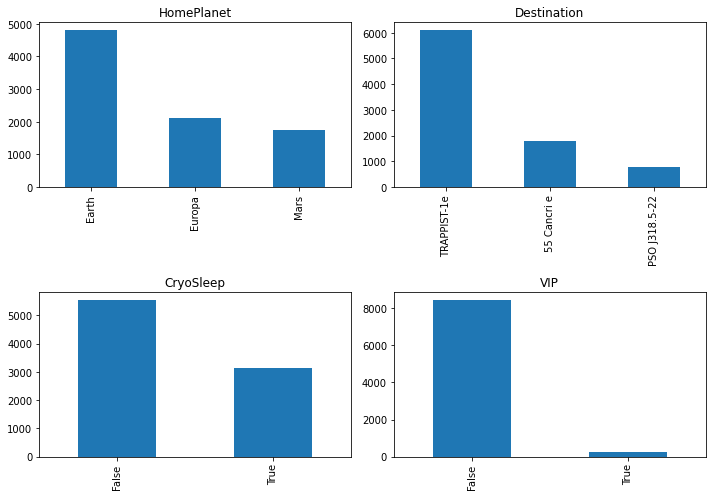

In [842]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
df['HomePlanet'].value_counts().plot(kind='bar', title='HomePlanet')
plt.subplot(2,2,2)
df['Destination'].value_counts().plot(kind='bar', title='Destination')
plt.subplot(2,2,3)
df['CryoSleep'].value_counts().plot(kind='bar', title='CryoSleep')
plt.subplot(2,2,4)
df['VIP'].value_counts().plot(kind='bar',title='VIP')
plt.tight_layout();

In [843]:
df["HomePlanet"] = df["HomePlanet"].map({'Earth':0, 'Europa':1, 'Mars':2}).astype(int)
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,1,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,0,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,1,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,1,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,0,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [844]:
unique_destinations = df["Destination"].unique()
df["Destination"] = df["Destination"].map(dict(zip(unique_destinations,list(range(len(unique_destinations)))))).astype(int)
df["Destination"].unique()

array([0, 1, 2])

In [845]:
df['Deck'] = df['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'M')
df['Port'] = df['Cabin'].apply(lambda x: x[-1] if pd.notnull(x) else 'S')

In [846]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
0,0001_01,1,False,B/0/P,0,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P
1,0002_01,0,False,F/0/S,0,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S
2,0003_01,1,False,A/0/S,0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S
3,0003_02,1,False,A/0/S,0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S
4,0004_01,0,False,F/1/S,0,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S


In [847]:
df['Deck'].value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
M     199
T       5
Name: Deck, dtype: int64

In [848]:
df['Port'].value_counts()

S    4487
P    4206
Name: Port, dtype: int64

In [849]:
df["Deck"] = df["Deck"].map({'F':0, 'G':1, 'E':2, 'B':3, 'C':4, 'D':5, 'A':6, 'M':7, 'T': 8}).astype(int)
df["Port"] = df["Port"].map({'P':0, 'S':1}).astype(int)
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
0,0001_01,1,False,B/0/P,0,39.0,False,0.0,0.0,0.0,0.0,0.0,False,3,0
1,0002_01,0,False,F/0/S,0,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0,1
2,0003_01,1,False,A/0/S,0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,6,1
3,0003_02,1,False,A/0/S,0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,6,1
4,0004_01,0,False,F/1/S,0,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2560,2747_01,2,True,F/570/P,0,49.0,False,0.0,0.0,0.0,0.0,0.0,True,0,0
2639,2822_02,0,True,G/450/S,0,5.0,False,0.0,0.0,0.0,0.0,0.0,False,1,1
5409,5777_01,0,False,F/1199/P,1,46.0,False,559.0,25.0,0.0,22.0,765.0,False,0,0
5697,6035_02,0,True,G/976/P,0,3.0,False,0.0,0.0,0.0,0.0,0.0,False,1,0


In [850]:
df.drop(['Cabin'], axis=1, inplace=True)
df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
0,0001_01,1,False,0,39.0,False,0.0,0.0,0.0,0.0,0.0,False,3,0
1,0002_01,0,False,0,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0,1
2,0003_01,1,False,0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,6,1
3,0003_02,1,False,0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,6,1
4,0004_01,0,False,0,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2560,2747_01,2,True,0,49.0,False,0.0,0.0,0.0,0.0,0.0,True,0,0
2639,2822_02,0,True,0,5.0,False,0.0,0.0,0.0,0.0,0.0,False,1,1
5409,5777_01,0,False,1,46.0,False,559.0,25.0,0.0,22.0,765.0,False,0,0
5697,6035_02,0,True,0,3.0,False,0.0,0.0,0.0,0.0,0.0,False,1,0


In [851]:
get_nulls(df)

,#nulls
PassengerId,0
HomePlanet,0
CryoSleep,0
Destination,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0
Spa,0


In [852]:
df.to_csv(r'cleaned_spaceship_titanic.csv', index=False)